In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import numpy as np
import pandas as pd
import plotly as py
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

from bubbly.bubbly import bubbleplot
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)
pd.set_option('display.max_columns', 25)

## From the [data source](https://earthquake.usgs.gov/earthquakes/map/?extent=-89.38519,-137.8125&extent=89.38519,537.1875&range=search&listOnlyShown=true&baseLayer=terrain&timeZone=utc&search=%7B%22name%22:%22Search%20Results%22,%22params%22:%7B%22starttime%22:%221900-01-01%2000:00:00%22,%22minmagnitude%22:7,%22orderby%22:%22time%22%7D%7D):
- [Column Definitions](https://earthquake.usgs.gov/data/comcat/index.php)
- This dataset lists all "major" earthquakes, which have a magnitude greater than 7.
- Earthquake magnitude is a measure of the “size” or amplitude, of the seismic waves generated by an earthquake source and is the maximum motion recorded by a **seismograph**.

In [2]:
df = pd.read_csv("mag_gt_7.csv")

In [3]:
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2023-02-06T10:24:49.258Z,38.0235,37.2030,10.000,7.5,mww,135.0,17.0,0.850,0.93,us,us6000jlqa,2023-02-11T01:12:32.117Z,"4 km SSE of Ekinözü, Turkey",earthquake,4.94,1.824,0.041,58.0,reviewed,us,us
1,2023-02-06T01:17:35.525Z,37.1662,37.0421,17.943,7.8,mww,216.0,17.0,0.134,0.67,us,us6000jllz,2023-02-11T15:01:49.216Z,"27 km E of Nurda??, Turkey",earthquake,6.27,3.278,0.050,38.0,reviewed,us,us
2,2023-01-18T06:06:11.317Z,2.7347,127.0598,28.566,7.0,mwc,130.0,17.0,1.974,1.18,us,us7000j553,2023-01-19T22:38:58.654Z,"153 km NW of Tobelo, Indonesia",earthquake,6.72,3.199,0.027,133.0,reviewed,us,us
3,2023-01-09T17:47:35.038Z,-7.0652,130.0047,105.140,7.6,mww,115.0,21.0,1.574,0.79,us,us7000j36j,2023-02-09T00:39:09.070Z,"Pulau Pulau Tanimbar, Indonesia",earthquake,6.90,3.158,0.041,58.0,reviewed,us,us
4,2023-01-08T12:32:42.372Z,-14.9466,166.8794,29.000,7.0,mww,116.0,36.0,6.096,0.57,us,us7000j2yw,2023-02-03T09:51:37.148Z,Vanuatu,earthquake,7.64,1.850,0.042,54.0,reviewed,us,us


In [4]:
print(f"This data frame has {df.shape[0]} rows and {df.shape[1]} columns.")

This data frame has 1483 rows and 22 columns.


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1483 entries, 0 to 1482
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             1483 non-null   object 
 1   latitude         1483 non-null   float64
 2   longitude        1483 non-null   float64
 3   depth            1467 non-null   float64
 4   mag              1483 non-null   float64
 5   magType          1483 non-null   object 
 6   nst              227 non-null    float64
 7   gap              303 non-null    float64
 8   dmin             132 non-null    float64
 9   rms              598 non-null    float64
 10  net              1483 non-null   object 
 11  id               1483 non-null   object 
 12  updated          1483 non-null   object 
 13  place            1471 non-null   object 
 14  type             1483 non-null   object 
 15  horizontalError  121 non-null    float64
 16  depthError       954 non-null    float64
 17  magError      

In [6]:
df.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,1483.000000,1483.000000,1467.000000,1483.000000,227.000000,303.000000,132.000000,598.000000,121.000000,954.000000,835.000000,96.000000
mean,7.907860,53.303716,73.755771,7.366015,450.017621,25.832013,2.900478,1.041679,6.422810,10.951092,0.307498,59.177083
std,28.990727,118.228370,136.940048,0.354941,186.462836,27.056158,2.841720,0.213424,2.179403,10.043094,0.162490,51.672449
min,-62.877000,-179.859000,-0.097000,7.000000,0.000000,8.000000,0.046160,0.070000,0.190000,0.000000,0.019000,0.000000
25%,-12.414000,-71.250000,15.000000,7.100000,329.000000,15.150000,0.977500,0.920000,5.500000,3.900000,0.200000,24.000000
50%,5.121000,121.506000,30.000000,7.270000,447.000000,19.700000,2.314000,1.065000,6.720000,6.000000,0.300000,47.000000
75%,35.211000,147.462500,42.600000,7.600000,576.500000,26.750000,3.868250,1.200000,7.640000,16.300000,0.400000,75.000000
max,73.148000,180.000000,675.400000,9.500000,934.000000,295.000000,21.859000,1.600000,10.700000,73.000000,1.640000,261.000000


In [7]:
missing = df.isna().sum()
missing = missing[missing>0].reset_index()
not_missing = list(set(df.columns.tolist())-set(missing['index'].tolist()))

In [8]:
df["time"] = pd.to_datetime(df["time"])

In [9]:
df = df.iloc[::-1].reset_index(drop=True)

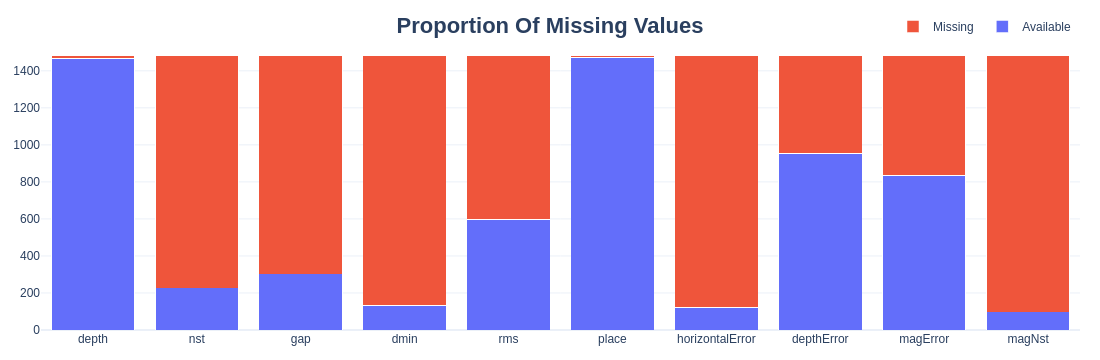

In [10]:
trace_missing = go.Bar(
    x=missing['index'],
    y=missing[0],
    name='Missing',
)
trace_available = go.Bar(
    x=missing['index'],
    y=df.shape[0]-missing[0],
    name='Available'
)

data = [trace_available,trace_missing]
fig = go.Figure(
    data=data,
    layout={'barmode':'stack'}
)
fig.update_layout(
    title = {
        'text': f'<b>Proportion Of Missing Values</b>',
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    height = 250,
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1,
        xanchor="right",
        x=1
    ),
    title_x = 0.5,
    hoverlabel = dict(
        font_size = 14,
    ),
    hovermode='x unified',
    title_font_size = 22,
    template = "plotly_white",
    margin = dict(t = 20, b = 20, l = 20, r = 20)
)

fig.show()

In [11]:
pct_missing_gt_75 = (missing[0] / df.shape[0] *100 > 75).sum() / df.shape[1] * 100
print(f"{pct_missing_gt_75:.2f}% of the dataset features are missing 75% or more data.\nWe can use statistical methods to fill the missing quantites specially for features which on early inspection seem correlated but for this notebook we will use the original data.")

22.73% of the dataset features are missing 75% or more data.
We can use statistical methods to fill the missing quantites specially for features which on early inspection seem correlated but for this notebook we will use the original data.


In [12]:
df['year'] = df['time'].dt.year

In [13]:
df['day'] = df['time'].dt.weekday

Text(0.5, 0, 'Date')

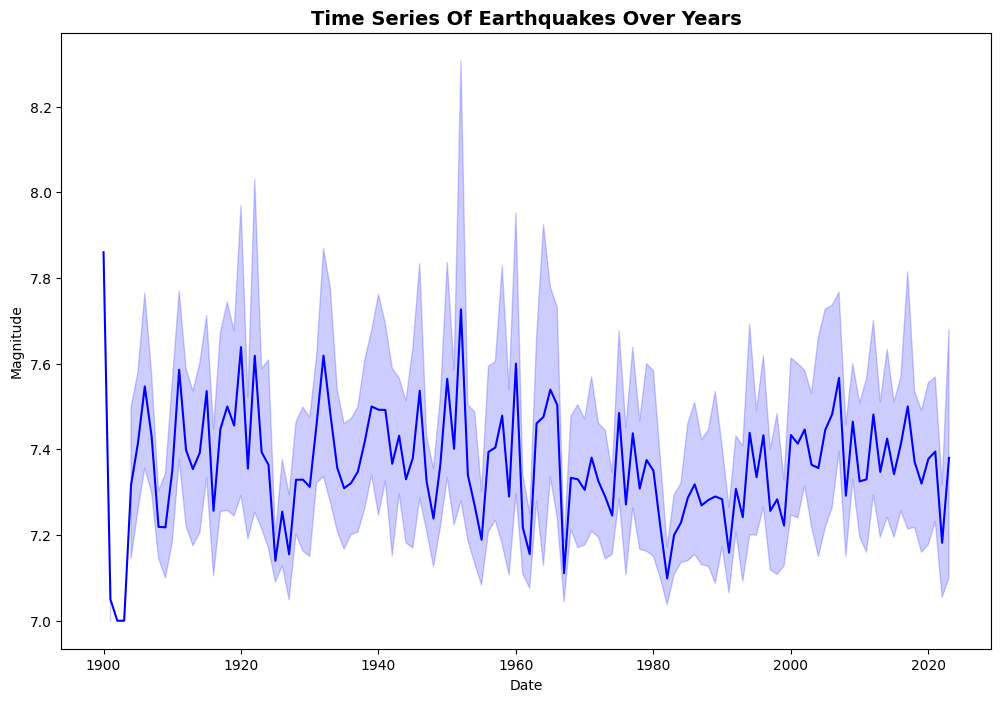

In [14]:
plt.figure(figsize=(12,8))
ts=sns.lineplot(data=df, y="mag", x="year", color="blue")
ts.set_title("Time Series Of Earthquakes Over Years", weight="bold").set_fontsize('14')
ts.set_ylabel("Magnitude")
ts.set_xlabel("Date")

The above plot concludes there was a relatively high seismic activity from 1950s to well into the 60s. 

The Magnitude scale is logarithmic, meaning that each whole number increase in magnitude indicates a tenfold increase in measured amplitude. To accurately reflect the relative amplitude of earthquakes of differing magnitudes, we create a new column (amp) calculated as follows:

In [15]:
df["amp"] = np.power(df["mag"], 10)

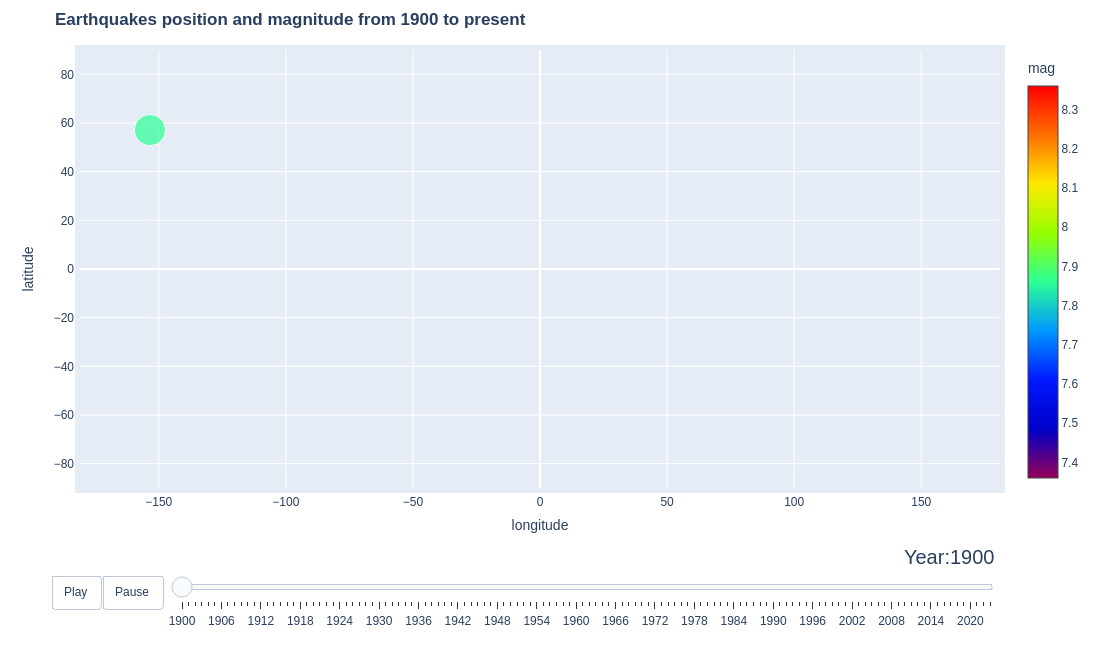

In [16]:
fig = bubbleplot(dataset=df, x_column='longitude', y_column='latitude', color_column='mag',
    bubble_column='mag', time_column='year', size_column='amp',
    x_title='longitude', y_title='latitude', 
    title='<b>Earthquakes position and magnitude from 1900 to present</b>', 
    colorscale='Rainbow', colorbar_title='mag',
    x_range=[-181,181], y_range=[-90,90], scale_bubble=1, height=650)
iplot(fig)

In [17]:
weekday = df["day"].value_counts().sort_index()

In [18]:
weekday.index = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

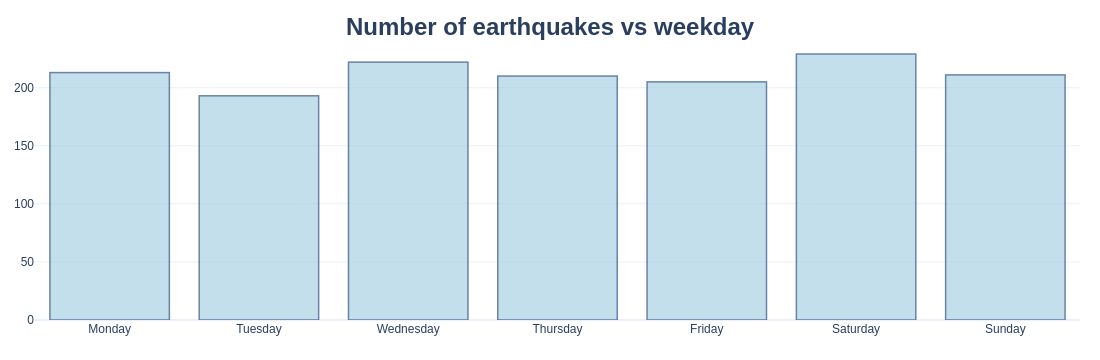

In [19]:
fig = go.Figure(
    data=[
        go.Bar(
            x=weekday.index,
            y=weekday.values,
            hovertemplate =
            '<b>%{x}</b><br><br>'+
            'Count: <b>%{y}</b><extra></extra>'
        )
    ]
)

fig.update_traces(
    marker_color='rgb(158,202,225)',
    marker_line_color='rgb(8,48,107)',
    marker_line_width=1.5,
    opacity=0.6
)

fig.update_layout(
    title = {
        'text': f'<b>Number of earthquakes vs weekday</b>',
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    height = 200,
    title_x = 0.5,
    hoverlabel = dict(
        font_size = 14,
    ),
    title_font_size = 24,
    template = "plotly_white",
    margin = dict(t = 40, b = 40, l = 20, r = 20)
)
fig.show()

That's unfortunate, no breaks, even on weekends :(

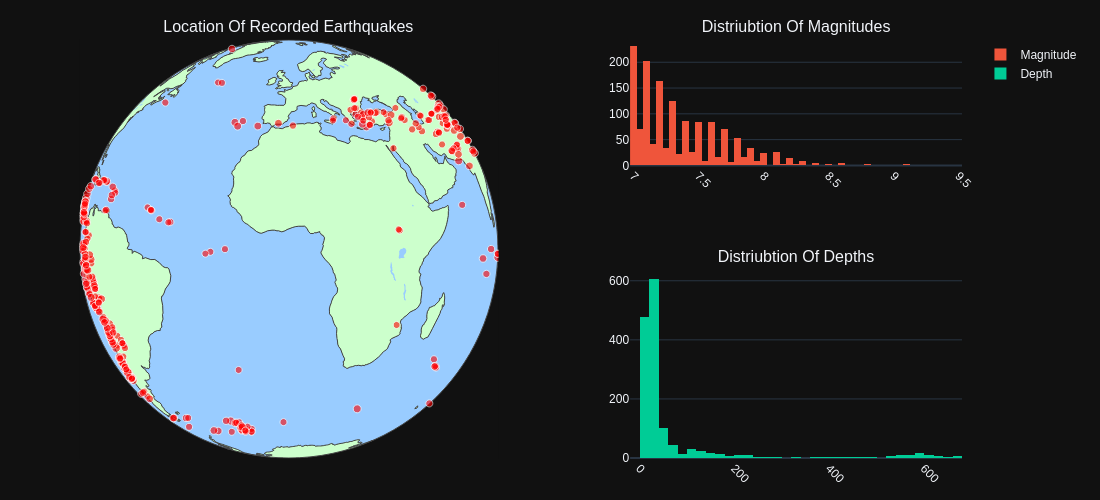

In [20]:
fig = make_subplots(
    rows=2,
    cols=2,
    column_widths=[0.6, 0.4],
    subplot_titles=('Location Of Recorded Earthquakes','Distriubtion Of Magnitudes',  'Distriubtion Of Depths'),
    row_heights=[0.4, 0.6],
    specs=[[
        {
            "type": "scattergeo",
            "rowspan": 2
        },
        {
            "type": "histogram"
        }
    ], [None, {"type": "bar"}]]
)

fig.add_trace(
    go.Scattergeo(
        lat=df["latitude"],
        lon=df["longitude"],
        customdata=df[["year", "place"]],
        mode="markers",
        hoverinfo="text",
        text=df.mag,
        showlegend=False,
        hovertemplate =
        '<b>%{customdata[1]}</b><br>'+
        '<b>Magnitude</b>: %{text:.2f}'+
        '<br><b>Year</b>: %{customdata[0]}<br><extra></extra>',
        marker=dict(
            color="red",
            size=df["mag"],
            opacity=0.6
        )
    ),
    row=1,
    col=1
)

fig.add_trace(
    go.Histogram(x=df.mag, name='Magnitude'),
    row=1, col=2
)

fig.add_trace(
    go.Histogram(x=df.depth, name='Depth'),
    row=2, col=2
)

fig.update_geos(
    projection_type="orthographic",
    landcolor="#ccffcc",
    oceancolor="#99ccff",
    showocean=True,
    lakecolor="#99ccff"
)

fig.update_xaxes(tickangle=45)

fig.update_layout(
    template="plotly_dark",
    margin=dict(r=40, t=40, b=40, l=40),
    height=500,
    hoverlabel = dict(
        font_size = 14,
        bgcolor="white",
        font_family = "Open Sans"
    ),
)

config = dict({
    'displayModeBar': True,
    'displaylogo': False,
    'modeBarButtonsToRemove': ['select', 'lasso', 'download']
})

fig.show(config=config)